In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

dfs = []

for dirname, _, filenames in os.walk('.'):  
    for filename in filenames:
        if filename.endswith('.csv'):
            file_path = os.path.join(dirname, filename)
            print(f"Yükleniyor: {file_path}")
            dfs.append(pd.read_csv(file_path))

for i, data in enumerate(dfs, start=1):
    rows, cols = data.shape
    print(f'df{i} -> {rows} rows, {cols} columns')


Yükleniyor: .\Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
Yükleniyor: .\Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
Yükleniyor: .\Friday-WorkingHours-Morning.pcap_ISCX.csv
Yükleniyor: .\Monday-WorkingHours.pcap_ISCX.csv
Yükleniyor: .\Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
Yükleniyor: .\Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
Yükleniyor: .\Tuesday-WorkingHours.pcap_ISCX.csv
Yükleniyor: .\Wednesday-workingHours.pcap_ISCX.csv
df1 -> 225745 rows, 79 columns
df2 -> 286467 rows, 79 columns
df3 -> 191033 rows, 79 columns
df4 -> 529918 rows, 79 columns
df5 -> 288602 rows, 79 columns
df6 -> 170366 rows, 79 columns
df7 -> 445909 rows, 79 columns
df8 -> 692703 rows, 79 columns


In [3]:
data = pd.concat(dfs, axis=0, ignore_index=True)

for df in dfs:
    del df

In [4]:

data.sample(n=10, random_state=42)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
746827,50545,232,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
946912,53,31226,2,2,68,380,34,34,34.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2216843,80,99951883,9,7,317,11595,317,0,35.222222,105.666667,...,32,999.0,0.0,999,999,99900000.0,0.0,99900000,99900000,DoS Hulk
699389,53,30894,4,2,140,172,35,35,35.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1170268,53,48943,2,2,88,166,44,44,44.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
800686,53,23728,1,1,56,84,56,56,56.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1434488,23,3,2,0,4,0,2,2,2.000000,0.000000,...,24,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1968368,80,141,2,0,0,0,0,0,0.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
934343,443,229,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
693547,443,176084,10,8,559,5437,192,0,55.900000,78.196974,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max         

In [6]:

print(f"Dataset Dimensions: {data.shape}")

Dataset Dimensions: (2830743, 79)


In [7]:
missing_value = data.isna().sum()
missing_value

 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64

In [8]:
for column, count in missing_value.items() : 
    if count != 0 : 
        print(f"column {column} has {count} missing value.")

column Flow Bytes/s has 1358 missing value.


In [9]:
duplicates_data = data.duplicated().sum()
duplicates_data


308381

In [10]:

data = data.drop_duplicates(keep='first')
del duplicates_data
data.shape

(2522362, 79)

In [11]:
is_inf = data.isin([np.inf, -np.inf])

inf_counts = is_inf.sum()
nan_counts = data.isnull().sum()


In [12]:
inf_counts[inf_counts > 0]


Flow Bytes/s       1211
 Flow Packets/s    1564
dtype: int64

In [13]:
nan_counts[nan_counts > 0]

Flow Bytes/s    353
dtype: int64

In [14]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

In [15]:
data.shape

(2520798, 79)

In [16]:
X = data.drop(columns=[' Label'])
y = data[' Label']

C:\Users\akcah\AppData\Local\Temp\ipykernel_11592\1255619909.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=attack_counts.values, y=attack_counts.index, palette='viridis')


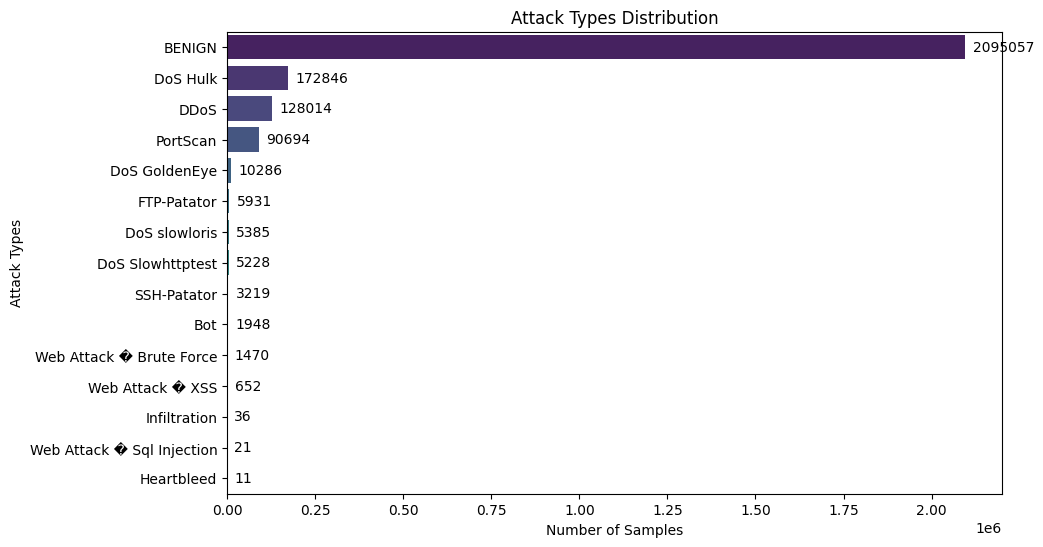

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

attack_counts = y.value_counts()

plt.figure(figsize=(10,6))
ax = sns.barplot(x=attack_counts.values, y=attack_counts.index, palette='viridis')

plt.title("Attack Types Distribution")
plt.xlabel("Number of Samples")
plt.ylabel("Attack Types")

for i, v in enumerate(attack_counts.values):
    ax.text(v + max(attack_counts.values)*0.01, i, str(v), color='black', va='center')

plt.show()


In [18]:
def analyze_feature_stats(data, labels, feature):
   
    data = data.copy()
    data.rename(columns=lambda x: x.strip(), inplace=True)
    filtered_data = data[data['Label'].isin(labels)].copy()
    stats = filtered_data.groupby('Label')[feature].agg(['mean', 'median', 'std'])
    print(f"\nStatistics for {feature}:")
    

    return stats


In [19]:
analyze_feature_stats(data, ['BENIGN', 'DoS Hulk','DDoS','PortScan'], 'Flow Bytes/s')


Statistics for Flow Bytes/s:


,mean,median,std
Label,,,
BENIGN,1.675795e+06,4249.615900,2.908620e+07
DDoS,6.050989e+04,160.099902,1.465416e+06
DoS Hulk,3.792414e+04,123.847281,3.711303e+05
PortScan,2.537042e+05,137931.034500,5.674908e+05


In [20]:
from sklearn.feature_selection import VarianceThreshold
numeric_data = data.select_dtypes(include=['number'])

selector = VarianceThreshold(threshold=0)
selector.fit(numeric_data)

constant_features = [column for column, keep in zip(numeric_data.columns, selector.get_support()) if not keep]

print("Sabit (varyansı 0) sayısal özellikler:")
print(constant_features)

Sabit (varyansı 0) sayısal özellikler:
[' Bwd PSH Flags', ' Bwd URG Flags', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']


In [21]:
data.rename(columns=lambda x: x.strip(), inplace=True)

In [22]:
data.drop(columns=['Bwd PSH Flags', 'Bwd URG Flags', 'Fwd Avg Bytes/Bulk',
                   'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk',
                   'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate'], inplace=True)

In [23]:
data.shape

(2520798, 71)

In [24]:
def find_duplicate_columns(df):
    duplicate_map = {}
    visited = set()

    for i in range(len(df.columns)):
        col1 = df.columns[i]
        for j in range(i + 1, len(df.columns)):
            col2 = df.columns[j]
            if col2 not in visited and df[col1].equals(df[col2]):
                duplicate_map.setdefault(col1, []).append(col2)
                visited.add(col2)
    
    return duplicate_map

duplicate_cols = find_duplicate_columns(data)

if duplicate_cols:
    for base, copies in duplicate_cols.items():
        print(f"The column [{base}] is identical to: {copies}")
else:
    print("There are no duplicate columns.")


The column [Total Fwd Packets] is identical to: ['Subflow Fwd Packets']
The column [Total Backward Packets] is identical to: ['Subflow Bwd Packets']
The column [Fwd PSH Flags] is identical to: ['SYN Flag Count']
The column [Fwd URG Flags] is identical to: ['CWE Flag Count']
The column [Fwd Header Length] is identical to: ['Fwd Header Length.1']


In [25]:
columns_to_drop = ['Subflow Fwd Packets', 'Subflow Bwd Packets', 'Fwd Header Length.1']
data.drop(columns=columns_to_drop, inplace=True)

In [26]:
data.shape

(2520798, 68)

In [27]:
num_df=data.select_dtypes(include=['int64', 'float64'])
num_df.shape

(2520798, 67)

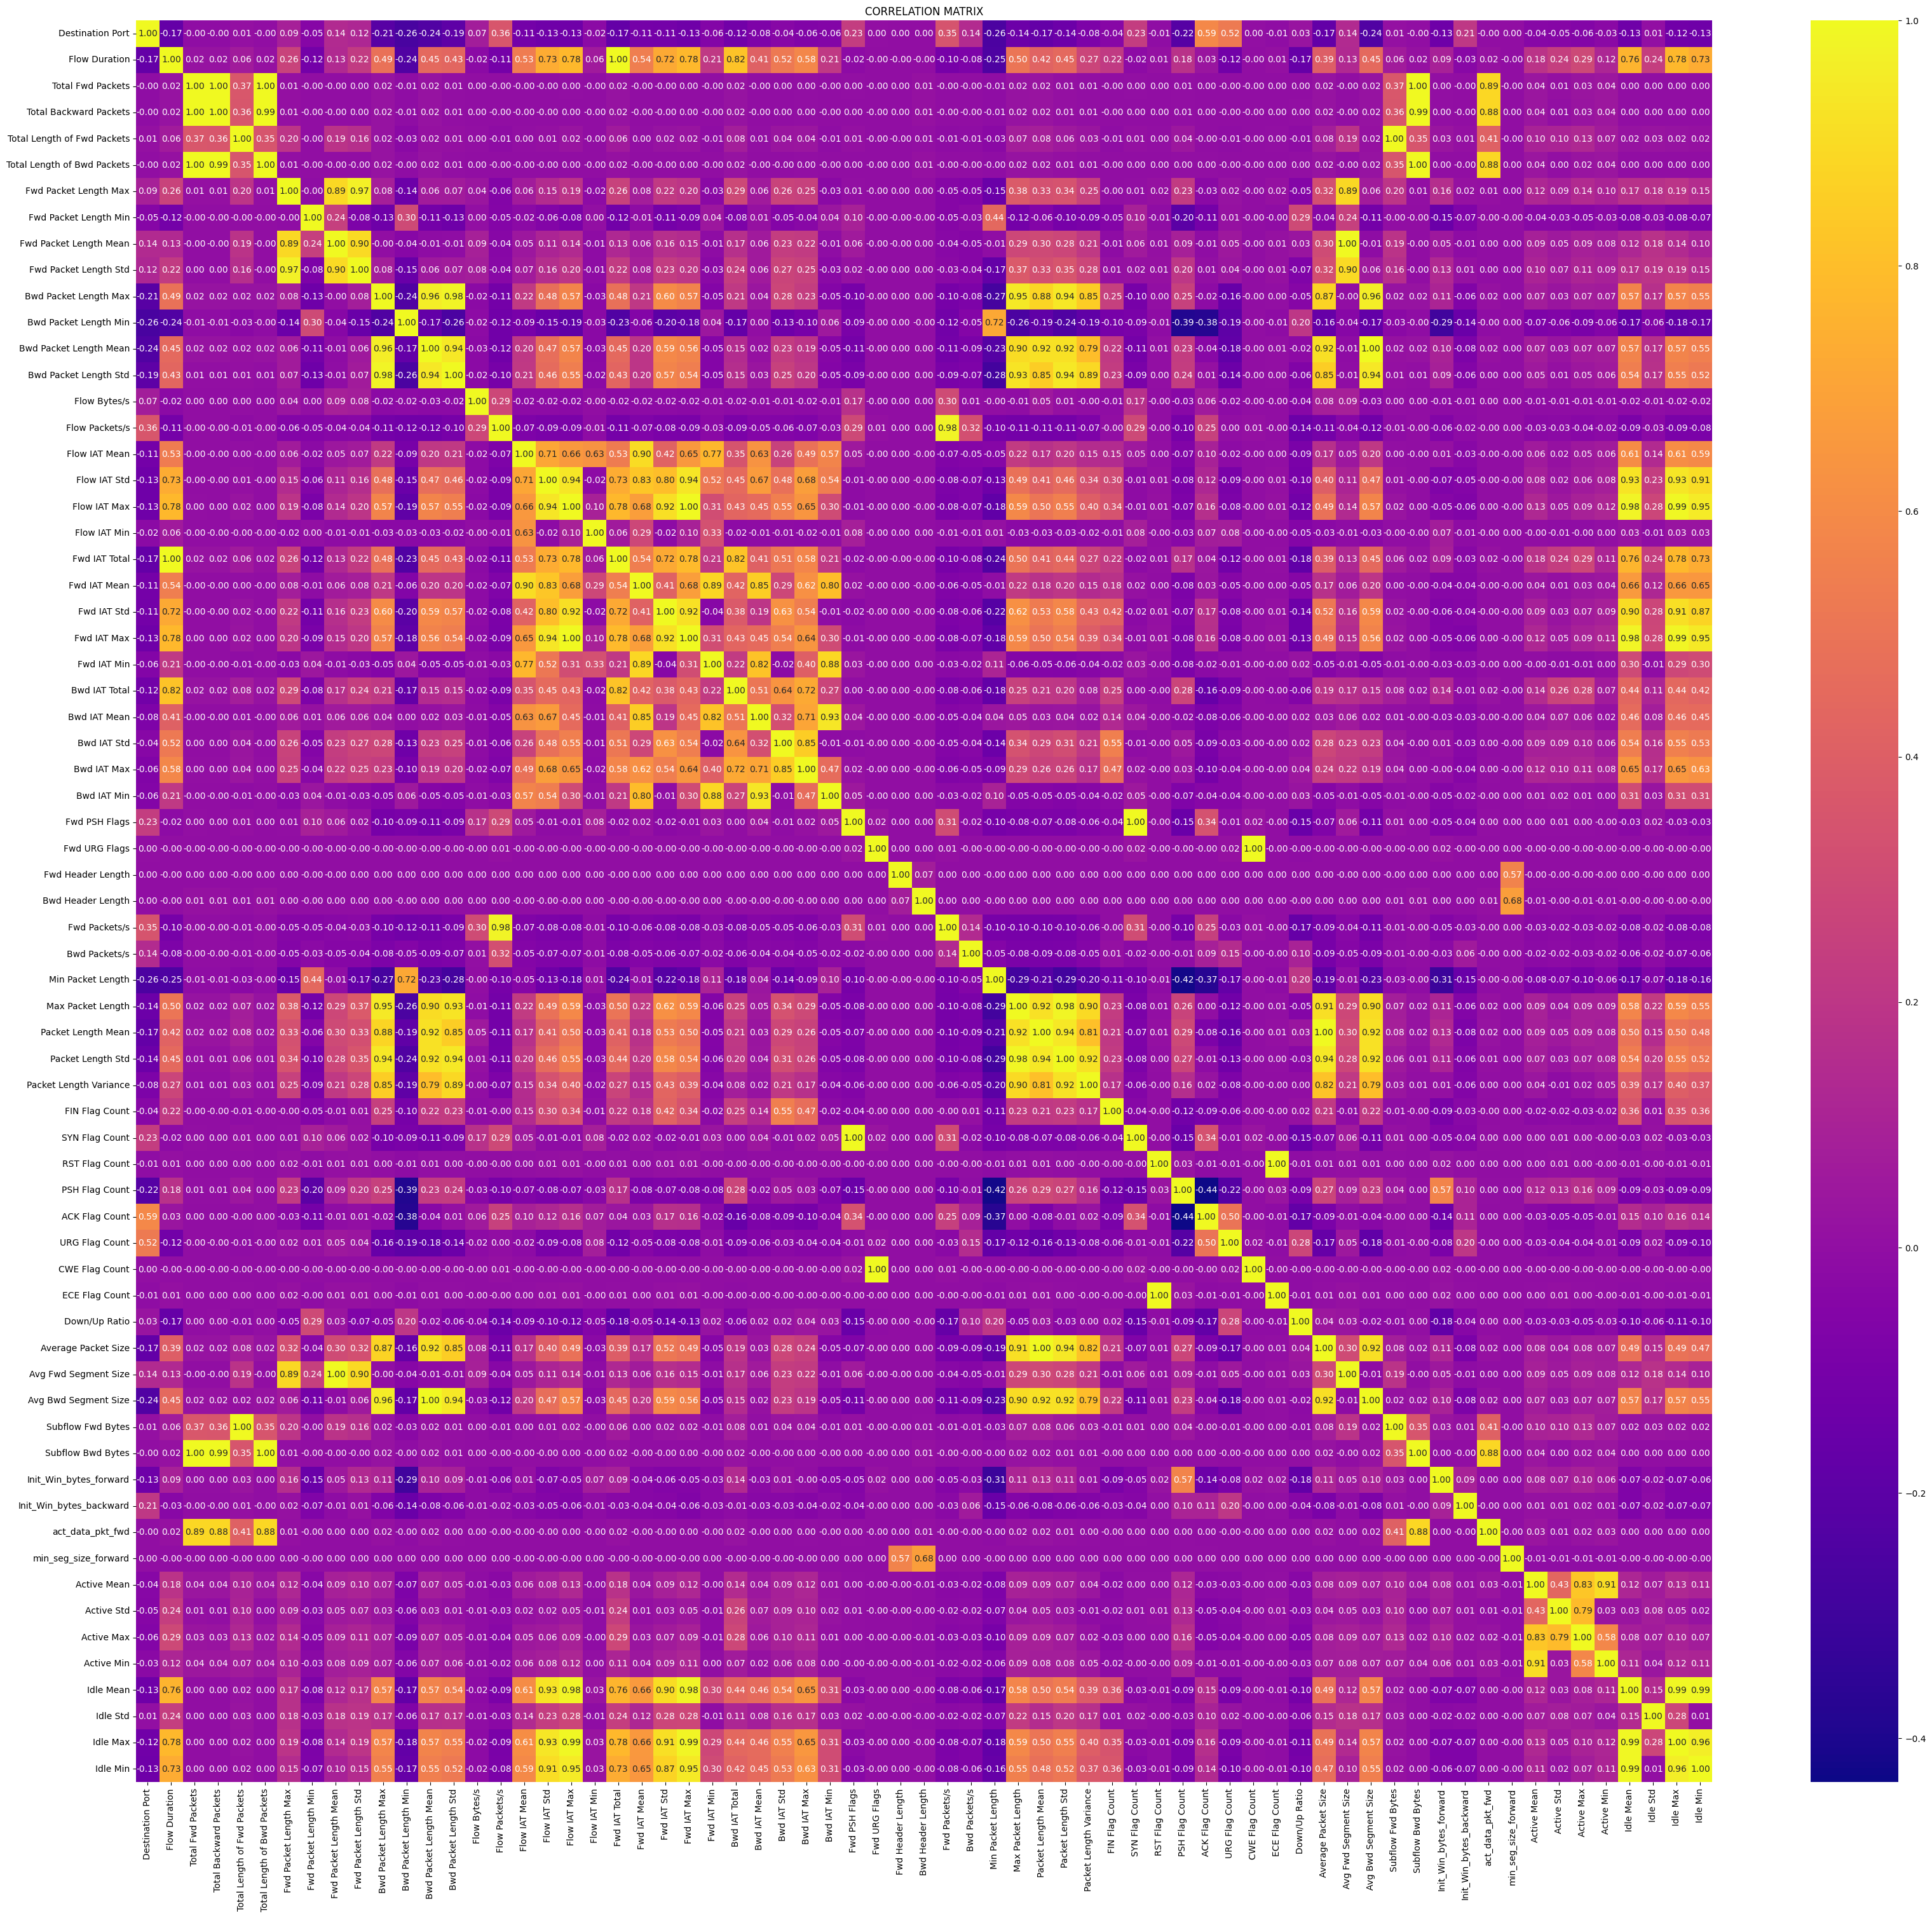

In [28]:
corr_matrix=num_df.corr()
plt.figure(figsize=(40,36))
sns.heatmap(corr_matrix, annot=True, cmap='plasma', fmt='.2f')
plt.title("CORRELATION MATRIX")
plt.show()

In [29]:
corr = num_df.corr().abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

threshold = 0.90
high_corr = [(c1, c2) for c1 in upper.columns for c2 in upper.index if upper.loc[c1, c2] and upper.loc[c1, c2] > threshold]

print(f"Number of highly correlated pairs (> {threshold}): {len(high_corr)}")
for c1, c2 in high_corr:
    print(f"{c1} - {c2}")

Number of highly correlated pairs (> 0.9): 61
Flow Duration - Fwd IAT Total
Total Fwd Packets - Total Backward Packets
Total Fwd Packets - Total Length of Bwd Packets
Total Fwd Packets - Subflow Bwd Bytes
Total Backward Packets - Total Length of Bwd Packets
Total Backward Packets - Subflow Bwd Bytes
Total Length of Fwd Packets - Subflow Fwd Bytes
Total Length of Bwd Packets - Subflow Bwd Bytes
Fwd Packet Length Max - Fwd Packet Length Std
Fwd Packet Length Mean - Avg Fwd Segment Size
Bwd Packet Length Max - Bwd Packet Length Mean
Bwd Packet Length Max - Bwd Packet Length Std
Bwd Packet Length Max - Max Packet Length
Bwd Packet Length Max - Packet Length Std
Bwd Packet Length Max - Avg Bwd Segment Size
Bwd Packet Length Mean - Bwd Packet Length Std
Bwd Packet Length Mean - Max Packet Length
Bwd Packet Length Mean - Packet Length Mean
Bwd Packet Length Mean - Packet Length Std
Bwd Packet Length Mean - Average Packet Size
Bwd Packet Length Mean - Avg Bwd Segment Size
Bwd Packet Length Std

In [ ]:
X = num_df.copy()           
y = data['Label']          

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_

feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
print(feature_importances)

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

                   Feature    Importance
13   Bwd Packet Length Std  7.304610e-02
52    Avg Bwd Segment Size  5.668968e-02
39       Packet Length Std  5.604214e-02
54       Subflow Bwd Bytes  4.360473e-02
40  Packet Length Variance  4.229655e-02
..                     ...           ...
30           Fwd PSH Flags  3.331438e-04
47          CWE Flag Count  9.188563e-07
31           Fwd URG Flags  6.242609e-07
48          ECE Flag Count  2.077779e-07
43          RST Flag Count  0.000000e+00

[67 rows x 2 columns]
                            precision    recall  f1-score   support

                    BENIGN       1.00      1.00      1.00    628329
                       Bot       0.87      0.77      0.81       562
                      DDoS       1.00      1.00      1.00     38336
             DoS GoldenEye       1.00      0.99      1.00      3178
                  DoS Hulk       1.00      1.00      1.00     52052
          DoS Slowhttptest       0.99      0.99      0.99      1559
        

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
print("Decision Tree Results:")
print(classification_report(y_test, y_pred))

Decision Tree Results:
                            precision    recall  f1-score   support

                    BENIGN       1.00      1.00      1.00    628329
                       Bot       0.83      0.82      0.83       562
                      DDoS       1.00      1.00      1.00     38336
             DoS GoldenEye       0.99      0.99      0.99      3178
                  DoS Hulk       1.00      1.00      1.00     52052
          DoS Slowhttptest       0.98      0.99      0.98      1559
             DoS slowloris       0.99      0.99      0.99      1618
               FTP-Patator       1.00      1.00      1.00      1727
                Heartbleed       1.00      1.00      1.00         3
              Infiltration       0.89      0.73      0.80        11
                  PortScan       0.99      0.98      0.99     27248
               SSH-Patator       1.00      1.00      1.00       948
  Web Attack � Brute Force       0.73      0.73      0.73       461
Web Attack � Sql Injecti

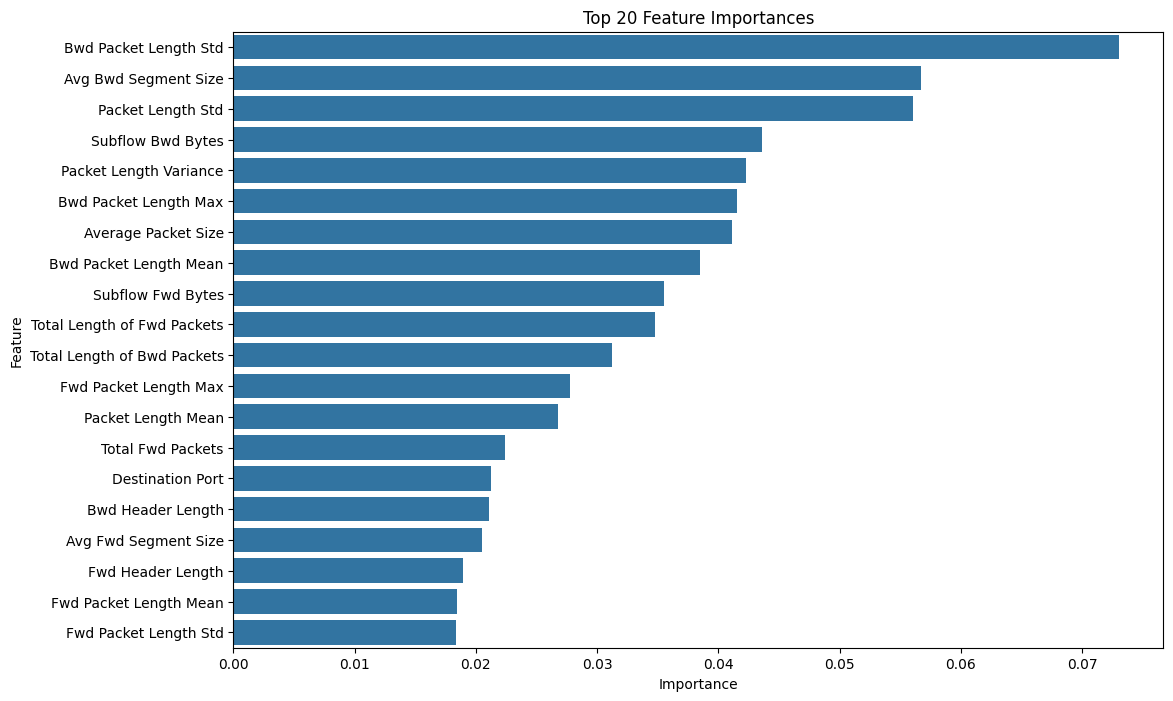

In [32]:
plt.figure(figsize=(12,8))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(20))
plt.title('Top 20 Feature Importances')
plt.show()

In [33]:
from sklearn.decomposition import PCA


group1 = ['Bwd Packet Length Max', 'Bwd Packet Length Mean', 'Bwd Packet Length Std']

pca = PCA(n_components=1)
data['Bwd Packet Length_Profile'] = pca.fit_transform(data[group1])

print(f"Explained variance ratio for Packets_Profile: {pca.explained_variance_ratio_[0]:.2f}")


data.drop(columns=group1, inplace=True)

Explained variance ratio for Packets_Profile: 0.99


In [34]:
data.shape

(2520798, 66)

In [35]:
group1 = ['Idle Mean', 'Idle Max', 'Idle Min']

pca2 = PCA(n_components=1)
data['Idle_Profile'] = pca2.fit_transform(data[group1])

print(f"Explained variance ratio for Packets_Profile: {pca2.explained_variance_ratio_[0]:.2f}")


data.drop(columns=group1, inplace=True)

Explained variance ratio for Packets_Profile: 0.99


In [38]:
import joblib
joblib.dump(rf, 'rf_model.pkl')

['rf_model.pkl']

In [39]:
joblib.dump(dt, 'dt_model.pkl')

['dt_model.pkl']